In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [51]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [52]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [53]:
train.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [54]:
Parch_vals = train['Parch'].unique()
Pclass_vals = train['Pclass'].unique()
Age_vals = train['Age'].unique()
Ticket_vals = train['Ticket'].unique()
Fare_vals = train['Fare'].unique()
Cabin_vals = train['Cabin'].unique()
Embarked_vals = train['Embarked'].unique()

print("Parch_vals: ", Parch_vals)
print("Pclass_vals: ", Pclass_vals)
print("Age_vals: ", Age_vals)
print("Ticket_vals: ", Ticket_vals)
print("Fare_vals: ", Fare_vals)
print("Cabin_vals: ", Cabin_vals)
print("Embarked_vals: ", Embarked_vals)


Parch_vals:  [0 1 2 5 3 4 6]
Pclass_vals:  [3 1 2]
Age_vals:  [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
Ticket_vals:  ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' 

# Apparenlty, the right way to interprete the passenger fares is:
- Each passenger buys a number of tickets for his family
- That is why the fares can get extremely expensive.

# Hence, we need to:
- Calculate the fare per person  (Although this wont help deep learning models, it will help other machine learning models)
- Add a is_alone column (also same reason as above)
- We notice that some names
- Encode our data in a binary format. (Because normalizing it does not seem to have really great performance in prev notebooks)

# We cannot find any sort of pattern in Name. Drop that column

In [55]:
train = train.drop(columns = ['Name'])

In [56]:
def add_features(data):
    # Family Size
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    
    # IsAlone
    data['IsAlone'] = 1
    data.loc[data['FamilySize'] > 1, 'IsAlone'] = 0
    
    # Ensure Fare is numeric
    data['Fare'] = pd.to_numeric(data['Fare'], errors='coerce')
    
    # Fare Per Person
    data['FarePerPerson'] = data['Fare'] / data['FamilySize']
    
    # Drop the original Fare column
    data.drop('Fare', axis=1, inplace=True)
    
    return data

train = add_features(train)

In [57]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,FamilySize,IsAlone,FarePerPerson
0,1,0,3,male,22.0,1,0,A/5 21171,NaN,S,2,0,3.62500
1,2,1,1,female,38.0,1,0,PC 17599,C85,C,2,0,35.64165
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,NaN,S,1,1,7.92500
3,4,1,1,female,35.0,1,0,113803,C123,S,2,0,26.55000
4,5,0,3,male,35.0,0,0,373450,NaN,S,1,1,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,NaN,S,1,1,13.00000
887,888,1,1,female,19.0,0,0,112053,B42,S,1,1,30.00000
888,889,0,3,female,NaN,1,2,W./C. 6607,NaN,S,4,0,5.86250
889,890,1,1,male,26.0,0,0,111369,C148,C,1,1,30.00000


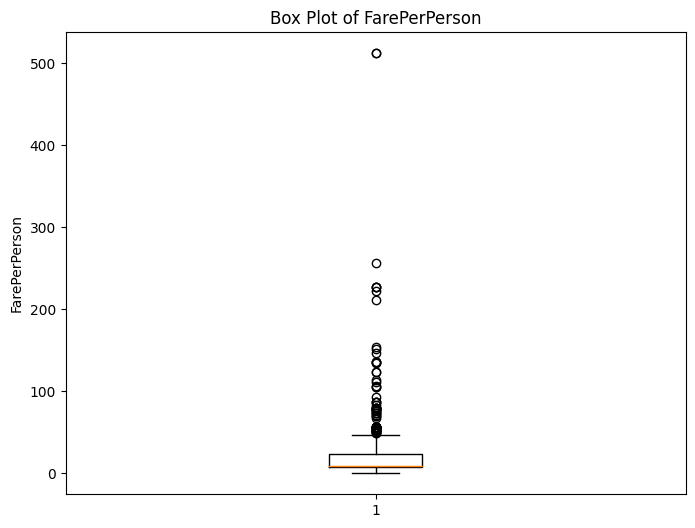

In [58]:
import matplotlib.pyplot as plt

def plot_box(df, column_name):
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column_name].dropna())
    plt.title(f'Box Plot of {column_name}')
    plt.ylabel(column_name)
    plt.show()

# Example usage:
plot_box(train, 'FarePerPerson')


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


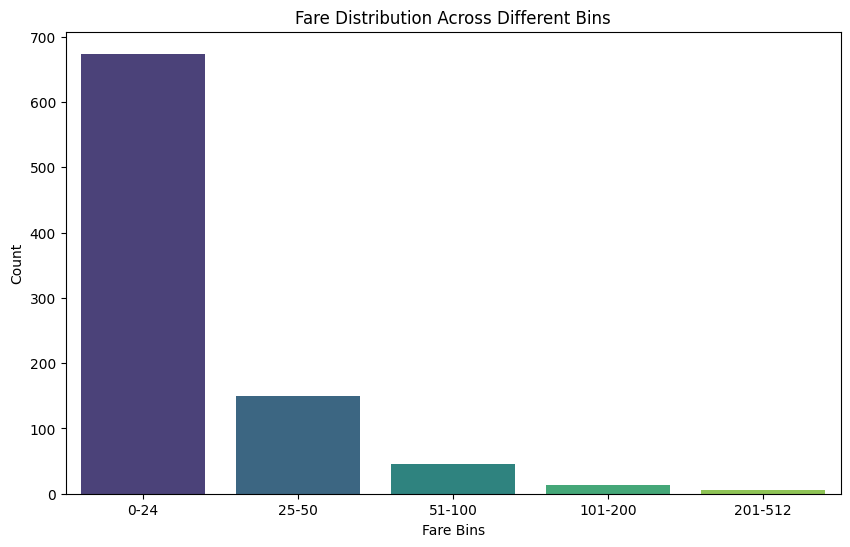

In [59]:
import seaborn as sns
def plot_fare_distribution(df):
    # Define the bins
    bins = [0, 25, 50, 100, 200, df['FarePerPerson'].max()]
    labels = ['0-24', '25-50', '51-100', '101-200', f'201-{int(df["FarePerPerson"].max())}']
    
    # Create a new column 'Fare_Bins' based on the bins
    df['Fare_Bins'] = pd.cut(df['FarePerPerson'], bins=bins, labels=labels, right=False)
    
    # Count the number of occurrences in each bin
    fare_distribution = df['Fare_Bins'].value_counts().sort_index()
    
    # Plot the bar plot using Matplotlib
    plt.figure(figsize=(10, 6))
    sns.barplot(x=fare_distribution.index, y=fare_distribution.values, palette="viridis")
    plt.title('Fare Distribution Across Different Bins')
    plt.xlabel('Fare Bins')
    plt.ylabel('Count')
    plt.show()

# Example usage:
train_temp = train.copy()
plot_fare_distribution(train_temp)

# Encoding Embarked, Age, Gender, cabin. All columns should be in some form of categorical class after this runs

In [60]:

def age_encoder(df, column_name='Age'):
    # Define the class ranges
    bins = [ 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 200]
    bin_labels = [f'age_{int(bins[i])}_{int(bins[i+1])}' for i in range(len(bins)-1)]
    
    # Create binary columns for each bin
    for i, label in enumerate(bin_labels):
        df[label] = ((df[column_name] > bins[i]) & (df[column_name] <= bins[i+1])).astype(int)
    
    # Add a binary column for NaN values
    df[f'{column_name}_NaN'] = df[column_name].isna().astype(int)
    
    return df

# def encode_fare_bins(df, column_name = 'Fare'):

    
#     # Define the bins and labels
#     bins = [0, 24, 50, 100, 200, np.inf]
#     labels = [1, 2, 3, 4, 5]  # Corresponding to the fare ranges

#     # Create a new column with the binned categories
#     df[column_name + '_Binned'] = pd.cut(df[column_name], bins=bins, labels=labels, right=False)
    
#     df[column_name] = df[column_name + '_Binned']
#     df = df.drop(columns = [column_name + '_Binned'])
    
#     return df


def encoding_Embarked(df):
    # Extract unique values from the 'Embarked' column, ignoring NaN
    unique_values = df['Embarked'].dropna().unique()
    
    # Create binary columns for each unique value in 'Embarked'
    for value in unique_values:
        df[f'Embarked_{value}'] = (df['Embarked'] == value).astype(int)
    
    # Add a binary column for NaN values
    df['Embarked_NaN'] = df['Embarked'].isna().astype(int)
    
    # Optionally drop the original 'Embarked' column
    df.drop(columns=['Embarked'], inplace=True)
    
    return df


def encoding_gender(df):
    genders = df['Sex'].unique()
    value_to_int = {value: index for index, value in enumerate(genders)}
    df['Sex'] = df['Sex'].map(value_to_int)

    return df

def encode_cabin(df, column_name='Cabin'):
    # Step 1: Split the Cabin into Cabin_alphabet and Cabin_number
    df['Cabin_alphabet'] = df[column_name].str.extract(r'([A-Za-z])')
    df['Cabin_number'] = df[column_name].str.extract(r'(\d+)')
    
    # Handle NaN values
    df['Cabin_alphabet'] = df['Cabin_alphabet'].where(df[column_name].notna(), np.nan)
    df['Cabin_number'] = df['Cabin_number'].where(df[column_name].notna(), np.nan)
    
    # Step 2: One-hot encode the Cabin_alphabet column
    cabin_dummies = pd.get_dummies(df['Cabin_alphabet'], prefix='cabin_alphabet', dummy_na=False)
    
    # Step 3: Combine the original DataFrame with the one-hot encoded columns
    df = pd.concat([df, cabin_dummies], axis=1)
    
    return df


def encode_fare_per_person(df):
    # Define the bins and corresponding column names
    bins = [0, 25, 50, 100, 200, df['FarePerPerson'].max()]
    bin_labels = ['0_to_25', '26_to_50', '51_to_100', '101_to_200', f'201_to_{int(df["FarePerPerson"].max())}']
    
    # Initialize the new binary columns with 0
    for label in bin_labels:
        df[f'FarePerPerson_{label}'] = 0
    
    # Assign 1 to the appropriate column based on the bin
    for i in range(len(bins) - 1):
        mask = (df['FarePerPerson'] > bins[i]) & (df['FarePerPerson'] <= bins[i + 1])
        df.loc[mask, f'FarePerPerson_{bin_labels[i]}'] = 1
    
    return df




In [61]:
train_temp = train.copy()
train_temp = age_encoder(train_temp)

train_temp = encoding_Embarked(train_temp)
train_temp = encoding_gender(train_temp)
train_temp = encode_cabin(train_temp)
train_temp = encode_fare_per_person(train_temp)
# train_temp = encode_fare_bins(train_temp)

In [67]:
train_temp

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,FamilySize,...,cabin_alphabet_D,cabin_alphabet_E,cabin_alphabet_F,cabin_alphabet_G,cabin_alphabet_T,FarePerPerson_0_to_25,FarePerPerson_26_to_50,FarePerPerson_51_to_100,FarePerPerson_101_to_200,FarePerPerson_201_to_512
0,1,0,3,0,22.0,1,0,A/5 21171,NaN,2,...,False,False,False,False,False,1,0,0,0,0
1,2,1,1,1,38.0,1,0,PC 17599,C85,2,...,False,False,False,False,False,0,1,0,0,0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,NaN,1,...,False,False,False,False,False,1,0,0,0,0
3,4,1,1,1,35.0,1,0,113803,C123,2,...,False,False,False,False,False,0,1,0,0,0
4,5,0,3,0,35.0,0,0,373450,NaN,1,...,False,False,False,False,False,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,NaN,1,...,False,False,False,False,False,1,0,0,0,0
887,888,1,1,1,19.0,0,0,112053,B42,1,...,False,False,False,False,False,0,1,0,0,0
888,889,0,3,1,NaN,1,2,W./C. 6607,NaN,4,...,False,False,False,False,False,1,0,0,0,0
889,890,1,1,0,26.0,0,0,111369,C148,1,...,False,False,False,False,False,0,1,0,0,0


In [62]:
train.shape

(891, 13)

In [63]:
test.shape

(418, 11)

In [64]:
result = pd.concat([train, test], ignore_index=True)
result

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,FamilySize,IsAlone,FarePerPerson,Name,Fare
0,1,0.0,3,male,22.0,1,0,A/5 21171,NaN,S,2.0,0.0,3.62500,NaN,NaN
1,2,1.0,1,female,38.0,1,0,PC 17599,C85,C,2.0,0.0,35.64165,NaN,NaN
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,NaN,S,1.0,1.0,7.92500,NaN,NaN
3,4,1.0,1,female,35.0,1,0,113803,C123,S,2.0,0.0,26.55000,NaN,NaN
4,5,0.0,3,male,35.0,0,0,373450,NaN,S,1.0,1.0,8.05000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,male,NaN,0,0,A.5. 3236,NaN,S,NaN,NaN,NaN,"Spector, Mr. Woolf",8.0500
1305,1306,NaN,1,female,39.0,0,0,PC 17758,C105,C,NaN,NaN,NaN,"Oliva y Ocana, Dona. Fermina",108.9000
1306,1307,NaN,3,male,38.5,0,0,SOTON/O.Q. 3101262,NaN,S,NaN,NaN,NaN,"Saether, Mr. Simon Sivertsen",7.2500
1307,1308,NaN,3,male,NaN,0,0,359309,NaN,S,NaN,NaN,NaN,"Ware, Mr. Frederick",8.0500


In [65]:
result

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,FamilySize,IsAlone,FarePerPerson,Name,Fare
0,1,0.0,3,male,22.0,1,0,A/5 21171,NaN,S,2.0,0.0,3.62500,NaN,NaN
1,2,1.0,1,female,38.0,1,0,PC 17599,C85,C,2.0,0.0,35.64165,NaN,NaN
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,NaN,S,1.0,1.0,7.92500,NaN,NaN
3,4,1.0,1,female,35.0,1,0,113803,C123,S,2.0,0.0,26.55000,NaN,NaN
4,5,0.0,3,male,35.0,0,0,373450,NaN,S,1.0,1.0,8.05000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,male,NaN,0,0,A.5. 3236,NaN,S,NaN,NaN,NaN,"Spector, Mr. Woolf",8.0500
1305,1306,NaN,1,female,39.0,0,0,PC 17758,C105,C,NaN,NaN,NaN,"Oliva y Ocana, Dona. Fermina",108.9000
1306,1307,NaN,3,male,38.5,0,0,SOTON/O.Q. 3101262,NaN,S,NaN,NaN,NaN,"Saether, Mr. Simon Sivertsen",7.2500
1307,1308,NaN,3,male,NaN,0,0,359309,NaN,S,NaN,NaN,NaN,"Ware, Mr. Frederick",8.0500


In [66]:
result['Cabin_encoded'] = result['Cabin'].apply(encode_cabin)
result['Cabin'] = result['Cabin_encoded']
result = result.drop(columns = ['Cabin_encoded', 'Ticket', 'Name'])

result = encoding_gender(result)
result = encoding_Embarked(result)
result = age_encoder(result)
result = encode_fare_bins(result)

TypeError: 'float' object is not subscriptable

In [ ]:
result

# DECISION TREE CLASSIFIER

In [ ]:
#Split the dataset back into the proper train and test set. Train shape: (888, 12)
test_start_index = train.shape[0]
# Split the DataFrame
train_df = result.iloc[:test_start_index]
test_df = result.iloc[test_start_index:]

train_df


In [ ]:
train_df

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X = train_df.drop(columns = ['Survived'])
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

# SCALING FOR DEEP NETWORKS

In [ ]:
#Now we have confirmed that we have no more NaN values. We start scaling each column.
#Convert each column to be scaled to float datatype, to prevent rounding errors.
# columns_to_scale = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age', 'Cabin', 'Embarked', 'FarePerPerson', 'FamilySize']
columns_to_scale = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age', 'Cabin', 'Embarked']
result[columns_to_scale] = result[columns_to_scale].astype(float)

means = result[columns_to_scale].mean()
stds = result[columns_to_scale].std()
result[columns_to_scale] = (result[columns_to_scale] - means) / stds


In [ ]:
result

In [ ]:
#Split the dataset back into the proper train and test set. Train shape: (888, 12)
test_start_index = train.shape[0]
# Split the DataFrame
train_df = result.iloc[:test_start_index]
test_df = result.iloc[test_start_index:]

train_df


In [ ]:
test_df

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
correlation_matrix = train_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# We can observe that gender is HIGHLY correlated to survival. 
- In our previous notebook, we failed to exceed 78% accuracy when we just throw all the values to the model.
- Hence, let's train 2 models. One for female, one for male
- By separating the models, perhaps we can have a better working model.

# Separate the male and female in both train and test datasets

In [ ]:
# Assuming 'train_df' is your DataFrame
train_df_male = train_df[train_df['Sex'] == 0]
train_df_female = train_df[train_df['Sex'] != 0]

test_df_male = test_df[test_df['Sex'] == 0]
test_df_female = test_df[test_df['Sex'] != 0]

train_df_male

In [ ]:
#Set the passengerId as the indexing. Easier to sort the data later.

train_df_male = train_df_male.set_index('PassengerId')
train_df_female = train_df_female.set_index('PassengerId')

test_df_male = test_df_male.set_index('PassengerId')
test_df_female = test_df_female.set_index('PassengerId')

train_df_male

In [ ]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        x = self.features[idx]
        y = self.labels[idx]
        return x, y


In [ ]:
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

# THIS FUNCTION WORKS FINE
def create_loaders(df, feature_inputs, feature_output):

    train_loader_list = []
    test_loader_list = []
    
    for cols in feature_inputs:
        temp_df = df.copy()
        
        features = temp_df[cols]
        labels = temp_df[feature_output]
        
        
        features_np = features.values.astype(np.float32)
        labels_np = labels.values.astype(np.float32)
        



        X_train, X_test, y_train, y_test = train_test_split(features_np, labels_np, test_size=0.2, random_state=42)
        train_dataset = CustomDataset(X_train, y_train)
        test_dataset = CustomDataset(X_test, y_test)

        batch_size = 32  # Number of samples per mini-batch
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
        
        train_loader_list.append(train_loader)
        test_loader_list.append(test_loader)
        
    return train_loader_list, test_loader_list



In [ ]:


class model(nn.Module):
    def __init__(self, no_features = 8, no_hidden_neurons = 128, no_labels = 1, p = 0.2):
        super().__init__()
        self.mlp_stack = nn.Sequential(
            #input layer
            nn.Linear(no_features, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
            
            #1st layer
            nn.Linear(no_hidden_neurons, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p),            

            
            
            #1st layer
            nn.Linear(no_hidden_neurons, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
            
            #3rd layer
            nn.Linear(no_hidden_neurons, no_labels),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.float() 
        logits = self.mlp_stack(x)
        
        return logits




class model2(nn.Module):
    def __init__(self, no_features = 8, no_hidden_neurons = 256, no_labels = 1, p = 0.2):
        super().__init__()
        self.mlp_stack = nn.Sequential(
            #input layer
            nn.Linear(no_features, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
            
            #1st layer
            nn.Linear(no_hidden_neurons, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
            
            
            #1st layer
            nn.Linear(no_hidden_neurons, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
            
            
            #1st layer
            nn.Linear(no_hidden_neurons, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
            
            #1st layer
            nn.Linear(no_hidden_neurons, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
            
            
                        #1st layer
            nn.Linear(no_hidden_neurons, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
            
            
                        #1st layer
            nn.Linear(no_hidden_neurons, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
            
            
                        #1st layer
            nn.Linear(no_hidden_neurons, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
            
            
                        #1st layer
            nn.Linear(no_hidden_neurons, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
        
            
            #3rd layer
            nn.Linear(no_hidden_neurons, no_labels),
            nn.Sigmoid(),
        )

    def forward(self, x):        
        x = x.float() 
        logits = self.mlp_stack(x)
        
        return logits



class model3(nn.Module):
    def __init__(self, no_features = 8, no_hidden_neurons = 64, no_labels = 1, p = 0.2):
        super().__init__()
        self.mlp_stack = nn.Sequential(
            #input layer
            nn.Linear(no_features, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
            
            #1st layer
            nn.Linear(no_hidden_neurons, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
            
            
            #1st layer
            nn.Linear(no_hidden_neurons, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
            
            
            #1st layer
            nn.Linear(no_hidden_neurons, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p), 
            
            #2nd layer
            nn.Linear(no_hidden_neurons, no_hidden_neurons),
            nn.ReLU(),
            nn.Dropout(p=p),    
            
            #3rd layer
            nn.Linear(no_hidden_neurons, no_labels),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.float() 
        logits = self.mlp_stack(x)
        
        return logits




In [ ]:
class EarlyStopper:
    def __init__(self, patience=1, min_delta=0.01):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = float('inf')

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False




In [ ]:
def train(model, criterion, optimizer, train_loader, test_loader, num_epochs=10000):
    model.train()
    early_stopper = EarlyStopper(patience=10)
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            outputs = outputs.float() 
            loss = criterion(outputs.squeeze(), labels.float().squeeze())  # `squeeze` to match output shape
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        # Calculate average training loss for the epoch
        epoch_loss = running_loss / len(train_loader)
        
        # Evaluate on the test set
        model.eval()  # Set model to evaluation mode
        validation_loss = 0.0
        with torch.no_grad():  # Disable gradient computation
            for inputs, labels in test_loader:
                outputs = model(inputs)
                outputs = outputs.float()
                loss = criterion(outputs.squeeze(), labels.float().squeeze())
                validation_loss += loss.item()
        
        # Calculate average validation loss for the epoch
        validation_loss /= len(test_loader)
        
        # Print loss every 50 epochs
        if epoch % 50 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Validation Loss: {validation_loss:.4f}')
        
        # Check for early stopping based on validation loss
        if early_stopper.early_stop(validation_loss):  
            print(f'Early stopping at epoch {epoch+1} with validation loss {validation_loss:.4f}')
            break
        
        model.train()  # Set model back to training mode for next epoch


In [ ]:
def evaluate(model, data_loader):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, labels in data_loader:
            outputs = model(inputs)
            predicted = (outputs.squeeze() > 0.5).float()  # Convert probabilities to binary predictions

            total += labels.size(0)
            correct += (predicted == labels.squeeze()).sum().item()

        accuracy = 100 * correct / total
        print(f'Accuracy: {accuracy:.2f}%')


In [ ]:

def model_trainer(model_list,train_loader_list, test_loader_list):
    
    for idx, model in enumerate(model_list):
        train_loader = train_loader_list[idx]
        test_loader = test_loader_list[idx]
        early_stopper = EarlyStopper(patience=10)
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters())
        train(model, criterion, optimizer, train_loader, test_loader)
        model.eval()
        evaluate(model, test_loader)  
        
        model_list[idx] = model
    
    return model_list

In [ ]:
def get_predictions(model_list, feature_inputs, test):
    pred_list = []
    
    for idx, model in enumerate(model_list):
        temp_df = test.copy()
        temp_df = temp_df[feature_inputs[idx]]
        features_np = temp_df.values
        features_tensor = torch.from_numpy(features_np).float()
        model.eval()
        output = model(features_tensor)
        #Free up GPU
        model = model.cpu()     
        pred_list.append(output)
    
    return pred_list


        
    
        
        

In [ ]:
#Method 1!
def method_1(output, output2, output3):
    pred1 = (output.squeeze() > 0.5).float()
    pred2 = (output2.squeeze() > 0.5).float()
    pred3 = (output3.squeeze() > 0.5).float()

    predictions = torch.stack([pred1, pred2, pred3])

    # Perform majority voting
    majority_vote = torch.sum(predictions, dim=0) >= 2  # 2 or more votes for class 1

    # Convert majority vote to float (if needed)
    majority_vote = majority_vote.float()
    
    return majority_vote

In [ ]:
def method_2(output, output2, output3):
    pred1 = output.squeeze() 
    pred2 = output2.squeeze() 
    pred3 = output3.squeeze()

    # Sum the predictions and calculate the average
    majority_vote = (pred1 + pred2 + pred3) / 3

    # Apply threshold to get the final prediction (0 or 1)
    majority_vote = (majority_vote >= 0.5).float()
    
    return majority_vote


In [ ]:
# feature_inputs = [['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'FamilySize', "IsAlone", "FarePerPerson"], ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'FamilySize', "IsAlone", "FarePerPerson"], ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'FamilySize', "IsAlone", "FarePerPerson"]]

feature_inputs = [['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']]
feature_output = ['Survived']


In [ ]:
def get_preds_gender(feature_inputs, feature_output, train_df, test_df):
    train_loader_list, test_loader_list = create_loaders(train_df, feature_inputs, feature_output)
    
    model_1 = model()
    model_2 = model2()
    model_3 = model3()
    
    model_list = [model_1, model_2, model_3]
    
    model_list = model_trainer(model_list, train_loader_list, test_loader_list)
    pred_list = get_predictions(model_list, feature_inputs, test_df)
    
    
    majority_vote = method_1(pred_list[0],pred_list[1],pred_list[2])
    majority_vote_np = majority_vote.cpu().numpy()
    
    test_df['Survived'] = majority_vote_np
    
    return test_df
    

In [ ]:
test_df_male = get_preds_gender(feature_inputs, feature_output, train_df_male, test_df_male)
test_df_female = get_preds_gender(feature_inputs, feature_output, train_df_female, test_df_female)

# FRom our logs, it seems that the female model is not performing well. The female dataset probably have some bad outliers? We need to check.

In [ ]:
train_df_female

In [ ]:


# Draw a box plot using matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot(train_df_female['Embarked'])
plt.title('Box Plot of column_name')
plt.ylabel('Values')

# Show the plot
plt.show()


In [ ]:
test_df_male

In [ ]:
test_df_male

In [ ]:
temp_df = get_preds_gender(feature_inputs, feature_output, train_df, test_df)
temp_df

In [ ]:
temp_df = temp_df[['PassengerId', 'Survived']]
temp_df['Survived'] = temp_df['Survived'].astype(int)

In [ ]:
temp_df

In [ ]:
temp_df.to_csv('predictions.csv', index = False)